In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('google_cleaned.csv')

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [5]:
df.isnull().sum().sum()

3180

In [6]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [7]:
df.shape

(10840, 16)

In [9]:
df.duplicated().sum()

483

In [10]:
df=df.drop_duplicates()

In [12]:
df.shape

(10357, 16)

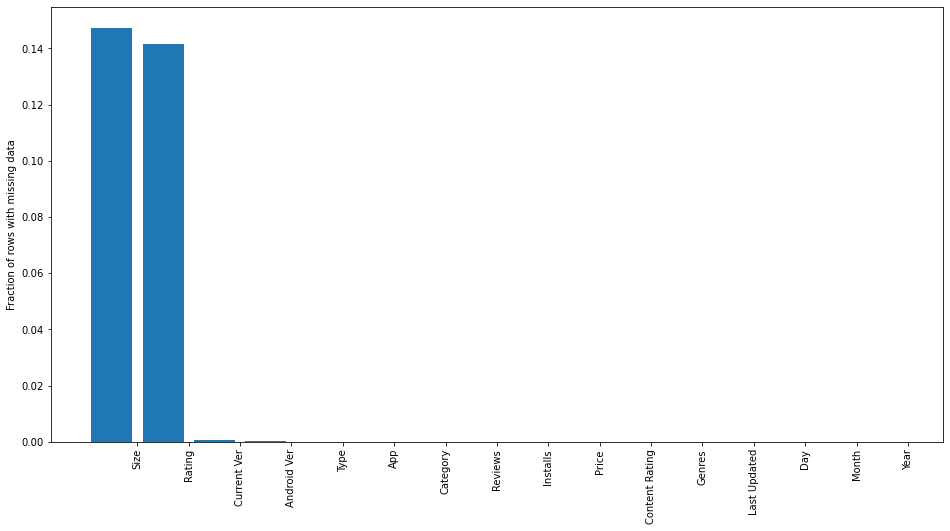

In [16]:
null_counts=df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()


In [17]:
df_copy=df.copy()

In [18]:
cols=[var for var in df_copy.columns if df_copy[var].isnull().mean()*100]

In [19]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [21]:
df_copy['Size'].isnull().mean()*100

14.733996330983876

In [22]:
df_copy['Installs'].isnull().mean()*100

0.0

In [20]:
for var in df_copy.columns:
    print(var)
    df_copy[var].isnull.mean()*100

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
Day
Month
Year


In [26]:
drop_df=df_copy[cols].dropna()

In [29]:
df_copy.shape

(10357, 16)

In [27]:
drop_df.shape

(7418, 5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

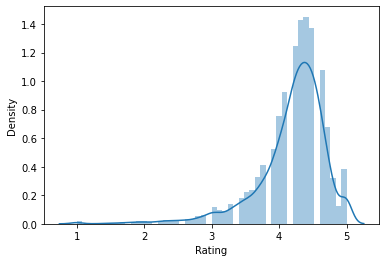

In [33]:
sns.distplot(df_copy['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

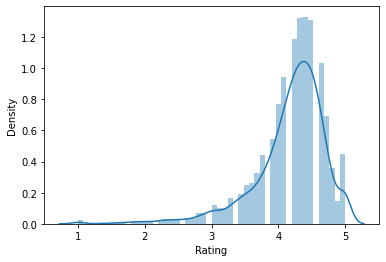

In [34]:
sns.distplot(drop_df['Rating'])

# missing value with mean, median

In [48]:
df_copy_me_mo=df.copy()

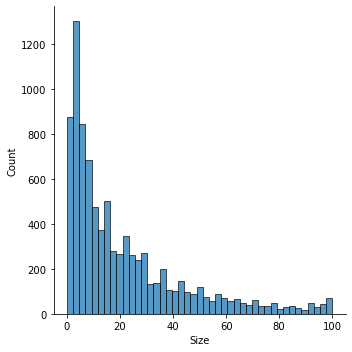

In [49]:
sns.displot(df['Size'])

In [50]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean()).isna().sum()

0

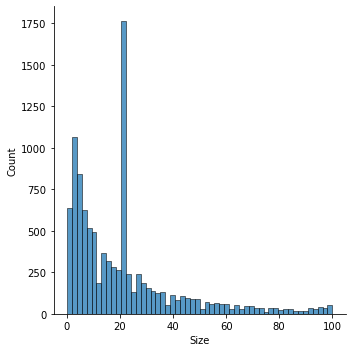

In [51]:
sns.displot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean()))

In [52]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median()).isna().sum()

0

<AxesSubplot:xlabel='Size', ylabel='Density'>

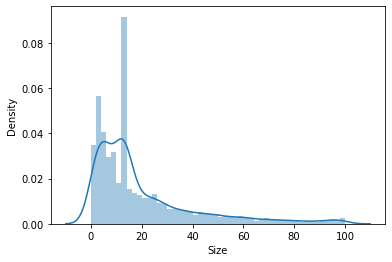

In [53]:
sns.distplot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median()))

# Random sample imputation

In [7]:
df_random=df.copy()

In [8]:
df_random['Size'].isnull().sum()

1695

In [9]:
random_sample=df_random['Size'].dropna().sample(df_random['Size'].isnull().sum())

In [10]:
random_sample

4290     14.0
10306    26.0
9683     73.0
10164     2.4
8963     41.0
         ... 
5580      1.6
5942      3.7
176       4.0
6042      7.3
6228     15.0
Name: Size, Length: 1695, dtype: float64

In [11]:
random_sample.index=df_random[df_random['Size'].isnull()].index

In [12]:
df_random.loc[df_random['Size'].isnull(),'Size']=random_sample